# Results - Evolution of Wages

How high are wages? Do they change over time (inflation adjusted)?

In [1]:
import numpy as np
import ast
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objects as go
%matplotlib inline

## Load data

In [3]:
df = pd.read_json("full_data.json")

In [6]:
df.head()

,skills,rate,category_1,category_2,date_2,SkillScore,skill_level,adj_rate
0,"[java, javafx]",26.5,"Web, Mobile & Software Dev",Web Development,2019-09-06,65.642857,high,25.3
1,ruby,127.5,"Web, Mobile & Software Dev",Web Development,2019-09-05,65.642857,high,121.9
2,"[amazon-web-services, article-writing, blog-wr...",15.0,Writing,Article & Blog Writing,2019-09-05,70.485714,high,14.3
3,html,27.0,"Web, Mobile & Software Dev",Web Development,2019-09-05,65.642857,high,25.8
4,"[administrative-support, communication, custom...",16.5,Admin Support,Personal / Virtual Assistant,2019-09-05,47.785714,low,15.8


## Figure: Median wages by job category

In [10]:
# distribution by category

category = df.groupby(['category_1']) \
       .agg({'date_2':'size',"adj_rate":"median"}) \
       .rename(columns={'date_2':'count', 'adj_rate':'median_wage'})

In [11]:
category = category.sort_values(by='count',ascending=False)
category

,count,median_wage
category_1,,
"Web, Mobile & Software Dev",237810,29.4
Sales & Marketing,124417,28.4
Design & Creative,115262,28.9
Admin Support,71147,16.2
Writing,66344,31.1
IT & Networking,27458,40.6
Translation,23545,25.8
Data Science & Analytics,23111,36.2
Engineering & Architecture,21304,32.5


In [12]:
sns.set_style("darkgrid")

Text(0.5, 0, 'Category_Major')

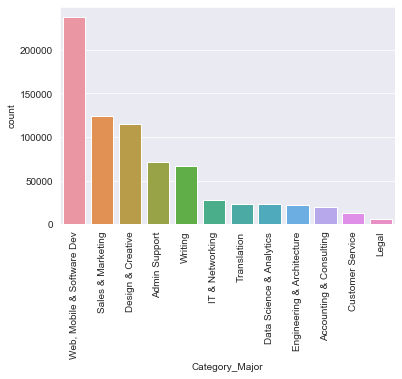

In [13]:
chart = sns.barplot(x=category.index, y="count", data=category)
chart.set_xticklabels(rotation=90, labels=category.index)
chart.set_xlabel('Category_Major')
#plt.savefig('count_category1.png',dpi=300,bbox_inches = "tight")

### a) by skill level

In [133]:
# distribution by category

category = df.groupby(['skill_level']) \
       .agg({'date_2':'size',"adj_rate":"median"}) \
       .rename(columns={'date_2':'count', 'adj_rate':'median_wage'})

In [134]:
category = category.reindex(index = ['low','medium','high'])

In [136]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

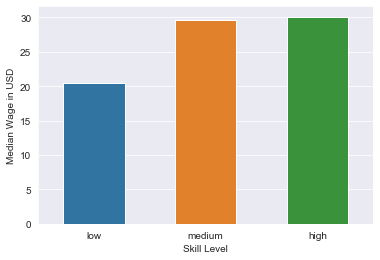

In [138]:
chart = sns.barplot(x=category.index, y="median_wage", data=category)
#chart.set_xticklabels(rotation=90, labels=category.index )
chart.set_xlabel('Skill Level')
chart.set_ylabel('Median Wage in USD')
change_width(chart, .55)
#plt.savefig('wage_skill_level.png',dpi=300,bbox_inches = "tight")

### b) by job category

In [130]:
# distribution by category

category = df.groupby(['category_1']) \
       .agg({'date_2':'size',"adj_rate":"median"}) \
       .rename(columns={'date_2':'count', 'adj_rate':'median_wage'})

In [131]:
sns.set_style("darkgrid")

Text(0, 0.5, 'Median Wage in USD')

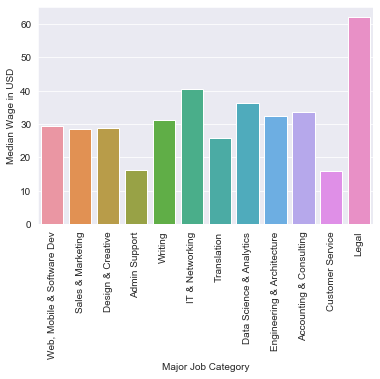

In [132]:
category = category.sort_values(by='count',ascending=False)
chart = sns.barplot(x=category.index, y="median_wage", data=category)
chart.set_xticklabels(rotation=90, labels=category.index )
chart.set_xlabel('Major Job Category')
chart.set_ylabel('Median Wage in USD')
#plt.savefig('wage_category1.png',dpi=300,bbox_inches = "tight")

## Figure: Evolution of wages over time

### a: Total median over time

In [145]:
sns.set_style("dark")

In [22]:
# Create date_time object
df["date_3"] = pd.to_datetime(df.date_2)
# As datetime object
df['month_year'] = pd.to_datetime(df['date_3']).dt.to_period('M')

In [23]:
# overall median wage by month
monthly = df.groupby(['month_year']) \
       .agg({'date_2':'size',"adj_rate":"median"}) \
       .rename(columns={'date':'count', 'adj_rate':'median_wage'})

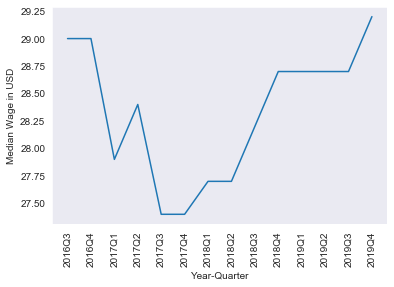

In [109]:
# Count per month all categories (date as string)

# Create month_year column
df['month_year'] = pd.to_datetime(df['date_3']).dt.to_period('Q')
df['month_year'] = df['month_year'].values.astype(str)

monthly_median = df.groupby(['month_year']) \
       .agg({'date_2':'size',"adj_rate":"median"}) \
       .rename(columns={'date':'count', 'adj_rate':'median_wage'})

monthly_median = monthly_median[monthly_median["date_2"] > 10]

ax = sns.lineplot(x = monthly_median.index, y=monthly_median.median_wage)
ticks = ax.set_xticklabels(rotation=90, labels=monthly_median.index)
ax.set_xlabel('Year-Quarter')
ax.set_ylabel('Median Wage in USD')
plt.savefig('wage_over_time.png',dpi=300,bbox_inches = "tight")

### b: Median by skill over time

In [166]:
monthly = df.groupby(['skill_level','month_year'],as_index=False) \
       .agg({'date_2':'size',"adj_rate":"median"}) \
       .rename(columns={'date_2':'count', 'adj_rate':'median_wage'})


In [150]:
monthly[monthly["count"] > 10].tail(50)

,skill_level,month_year,count,median_wage
2,high,2016Q3,5526,31.5
3,high,2016Q4,12305,30.0
4,high,2017Q1,14182,29.4
5,high,2017Q2,25908,29.9
6,high,2017Q3,36104,29.4
7,high,2017Q4,30455,29.4
8,high,2018Q1,19513,28.7
9,high,2018Q2,17640,29.2
10,high,2018Q3,12296,30.1
11,high,2018Q4,19420,30.6


In [143]:
#monthly = monthly.sort_values("skill_level", ascending=True)

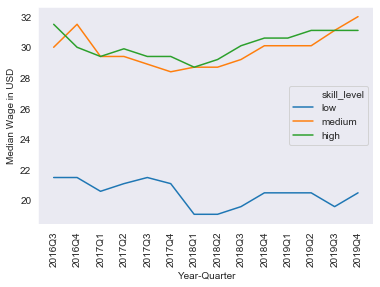

In [167]:
ax = sns.lineplot(x='month_year', y='median_wage', hue='skill_level', hue_order=["low","medium","high"], 
             data=monthly[monthly["count"] > 10])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=monthly[monthly["count"] > 10].month_year)
plt.xlabel("Year-Quarter")
plt.ylabel("Median Wage in USD")
plt.savefig('wage_by_skill_time.png',dpi=300,bbox_inches = "tight")

# Figure: Wages over time by job category

In [168]:
# Wage by category over time

monthly = df.groupby(['category_1','month_year'],as_index=False) \
       .agg({'date_2':'size',"adj_rate":"median"}) \
       .rename(columns={'date_2':'count', 'adj_rate':'median_wage'})

#monthly = monthly[monthly["count"] > 10]

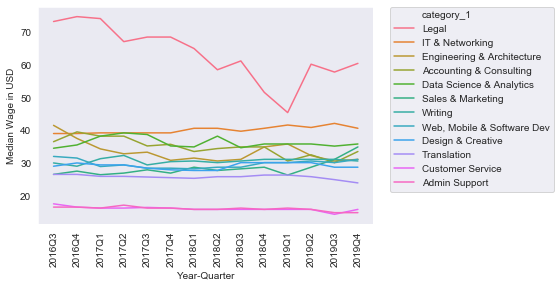

In [169]:
ax = sns.lineplot(x='month_year', y='median_wage', hue='category_1', 
             data=monthly[monthly["count"] > 10].sort_values("median_wage", ascending=False))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside
ax.set_xticklabels(rotation=90, labels=monthly[monthly["count"] > 10].month_year)
plt.xlabel("Year-Quarter")
plt.ylabel("Median Wage in USD")
plt.savefig('wage_by_category.png',dpi=300,bbox_inches = "tight")